In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Setting
sns.despine(left=True, bottom=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.4f}'.format)
sns.set()

%matplotlib inline

In [43]:
feat_eng_jams_early_morning = pd.read_parquet('..\\dataset\\feat_eng_jams_early_morning.parquet')
feat_eng_jams_morning = pd.read_parquet('..\\dataset\\feat_eng_jams_morning.parquet')
feat_eng_jams_afternoon = pd.read_parquet('..\\dataset\\feat_eng_jams_afternoon.parquet')
feat_eng_jams_late_afternoon = pd.read_parquet('..\\dataset\\feat_eng_jams_late_afternoon.parquet')
feat_eng_jams_night = pd.read_parquet('..\\dataset\\feat_eng_jams_night.parquet')
feat_eng_jams_late_night = pd.read_parquet('..\\dataset\\feat_eng_jams_late_night.parquet')

In [44]:
feat_eng_jams_early_morning = feat_eng_jams_early_morning.set_index('street')
feat_eng_jams_morning = feat_eng_jams_morning.set_index('street')
feat_eng_jams_afternoon = feat_eng_jams_afternoon.set_index('street')
feat_eng_jams_late_afternoon = feat_eng_jams_late_afternoon.set_index('street')
feat_eng_jams_night = feat_eng_jams_night.set_index('street')
feat_eng_jams_late_night = feat_eng_jams_late_night.set_index('street')

In [45]:
feat_eng_jams_early_morning.sample(3)

,occurance,median_length__mean,median_length__median,median_length__std,median_length__count,median_delay__mean,median_delay__median,median_delay__std,median_delay__count,median_speed_kmh__mean,median_speed_kmh__median,median_speed_kmh__std,median_speed_kmh__count,total_records__mean,total_records__median,total_records__std,total_records__count,median_level__mean,median_level__median,median_level__std,median_level__count,median_length__mean__weekday_0,median_length__mean__weekday_1,median_length__mean__weekday_2,median_length__mean__weekday_3,median_length__mean__weekday_4,median_length__mean__weekday_5,median_length__mean__weekday_6,median_length__median__weekday_0,median_length__median__weekday_1,median_length__median__weekday_2,median_length__median__weekday_3,median_length__median__weekday_4,median_length__median__weekday_5,median_length__median__weekday_6,median_length__std__weekday_0,median_length__std__weekday_1,median_length__std__weekday_2,median_length__std__weekday_3,median_length__std__weekday_4,median_length__std__weekday_5,median_length__std__weekday_6,median_length__count__weekday_0,median_length__count__weekday_1,median_length__count__weekday_2,median_length__count__weekday_3,median_length__count__weekday_4,median_length__count__weekday_5,median_length__count__weekday_6,median_delay__mean__weekday_0,median_delay__mean__weekday_1,median_delay__mean__weekday_2,median_delay__mean__weekday_3,median_delay__mean__weekday_4,median_delay__mean__weekday_5,median_delay__mean__weekday_6,median_delay__median__weekday_0,median_delay__median__weekday_1,median_delay__median__weekday_2,median_delay__median__weekday_3,median_delay__median__weekday_4,median_delay__median__weekday_5,median_delay__median__weekday_6,median_delay__std__weekday_0,median_delay__std__weekday_1,median_delay__std__weekday_2,median_delay__std__weekday_3,median_delay__std__weekday_4,median_delay__std__weekday_5,median_delay__std__weekday_6,median_delay__count__weekday_0,median_delay__count__weekday_1,median_delay__count__weekday_2,median_delay__count__weekday_3,median_delay__count__weekday_4,median_delay__count__weekday_5,median_delay__count__weekday_6,median_speed_kmh__mean__weekday_0,median_speed_kmh__mean__weekday_1,median_speed_kmh__mean__weekday_2,median_speed_kmh__mean__weekday_3,median_speed_kmh__mean__weekday_4,median_speed_kmh__mean__weekday_5,median_speed_kmh__mean__weekday_6,median_speed_kmh__median__weekday_0,median_speed_kmh__median__weekday_1,median_speed_kmh__median__weekday_2,median_speed_kmh__median__weekday_3,median_speed_kmh__median__weekday_4,median_speed_kmh__median__weekday_5,median_speed_kmh__median__weekday_6,median_speed_kmh__std__weekday_0,median_speed_kmh__std__weekday_1,median_speed_kmh__std__weekday_2,median_speed_kmh__std__weekday_3,median_speed_kmh__std__weekday_4,median_speed_kmh__std__weekday_5,median_speed_kmh__std__weekday_6,median_speed_kmh__count__weekday_0,median_speed_kmh__count__weekday_1,median_speed_kmh__count__weekday_2,median_speed_kmh__count__weekday_3,median_speed_kmh__count__weekday_4,median_speed_kmh__count__weekday_5,median_speed_kmh__count__weekday_6,total_records__mean__weekday_0,total_records__mean__weekday_1,total_records__mean__weekday_2,total_records__mean__weekday_3,total_records__mean__weekday_4,total_records__mean__weekday_5,total_records__mean__weekday_6,total_records__median__weekday_0,total_records__median__weekday_1,total_records__median__weekday_2,total_records__median__weekday_3,total_records__median__weekday_4,total_records__median__weekday_5,total_records__median__weekday_6,total_records__std__weekday_0,total_records__std__weekday_1,total_records__std__weekday_2,total_records__std__weekday_3,total_records__std__weekday_4,total_records__std__weekday_5,total_records__std__weekday_6,total_records__count__weekday_0,total_records__count__weekday_1,total_records__count__weekday_2,total_records__count__weekday_3,total_records__count__weekday_4,total_records__count__weekday_5,total_records__count__w

## Outliers

In [56]:
def outlier_imputer(dataframe):
    
    for col in dataframe.columns:
        Q1 = np.percentile(dataframe[col], 25)
        Q3 = np.percentile(dataframe[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        # obtain outliers' indexes
        query_top = f'{col} > (@Q3 + @outlier_step)'
        query_below = f'{col} < (@Q1 - @outlier_step)'
        outlier_series_top = dataframe.query(query_top)
        outlier_series_below = dataframe.query(query_below)

        # impute oulier values
        dataframe.loc[outlier_series_top.index, col] = Q3 + outlier_step
        dataframe.loc[outlier_series_below.index, col] = Q1 - outlier_step
    
    return dataframe

In [57]:
outlier_impute_early_morning = outlier_imputer(feat_eng_jams_early_morning)
outlier_impute_morning = outlier_imputer(feat_eng_jams_morning)
outlier_impute_afternoon = outlier_imputer(feat_eng_jams_afternoon)
outlier_impute_late_afternoon = outlier_imputer(feat_eng_jams_late_afternoon)
outlier_impute_night = outlier_imputer(feat_eng_jams_night)
outlier_impute_late_night = outlier_imputer(feat_eng_jams_late_night)

## Feature Selection

In [58]:
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [71]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(outlier_impute_early_morning)

In [72]:
pca_out = PCA(n_components=0.7).fit_transform(scaled_data)
pca_cols = [ f'PCA {i}' for i in range(1, pca_out.shape[1]+1)]
df_pca = pd.DataFrame(pca_out, columns=pca_cols)

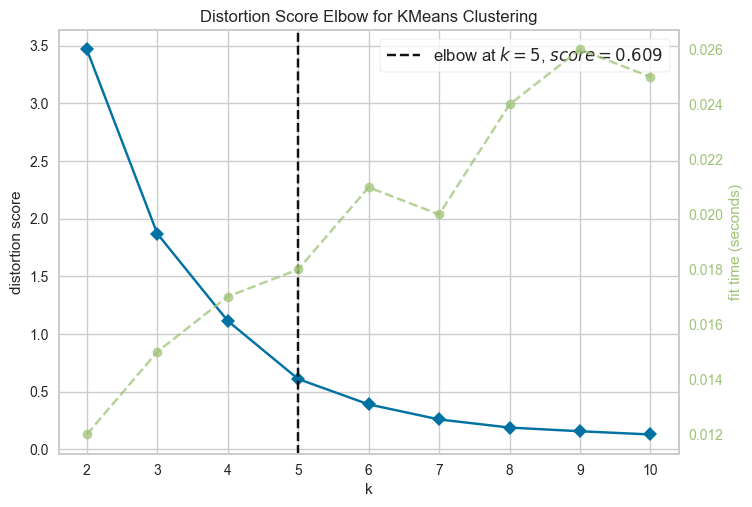

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
Elbow_M = KElbowVisualizer(KMeans(), k=10) # check for 10 clusters
Elbow_M.fit(df_pca)
Elbow_M.show() # from elbow method, 5 clusters are the good numbers of cluster

In [74]:
cluster = (
            KMeans(n_clusters = Elbow_M.elbow_value_)
            .fit_predict(df_pca)    
    )

In [75]:
feat_eng_jams_early_morning['cluster'] = cluster

## Check Cluster Characteristics

In [77]:
feat_eng_jams_early_morning.corr()['cluster'].sort_values(ascending=False).head(10)

cluster                 1.0000
occurance               0.1598
median_length__mean        NaN
median_length__median      NaN
median_length__std         NaN
median_length__count       NaN
median_delay__mean         NaN
median_delay__median       NaN
median_delay__std          NaN
median_delay__count        NaN
Name: cluster, dtype: float64

In [66]:
sel_cols = [
    'occurance', 'median_length__median', 'median_delay__median', 
    'median_speed_kmh__median', 'total_records__median', 'median_level__median', 'cluster'
    ]

In [78]:
feat_eng_jams_early_morning[sel_cols].groupby('cluster').agg(['median', 'min', 'max', 'std'])

occurance                          median_length__median         \
           median     min      max     std                median    min   
cluster                                                                   
0          2.0000  1.0000   7.0000  1.8912                0.0000 0.0000   
1        179.5000 31.0000 179.5000 56.0817                0.0000 0.0000   
2         78.0000 23.0000 161.0000 37.6348                0.0000 0.0000   
3         96.5000 52.0000 139.0000 37.1005                0.0000 0.0000   
4         11.0000  8.0000  22.0000  4.0514                0.0000 0.0000   

                      median_delay__median                       \
           max    std               median    min    max    std   
cluster                                                           
0       0.0000 0.0000               0.0000 0.0000 0.0000 0.0000   
1       0.0000 0.0000               0.0000 0.0000 0.0000 0.0000   
2       0.0000 0.0000               0.0000 0.0000 0.0000 0.0000   
3       0.0000 0.0000               0.0000 0.0000 0.0000 0.0000   
4       0.0000 0.0000               0.0000 0.0000 0.0000 0.0000   

        median_speed_kmh__median                      total_records__median  \
                          median    min    max    std                median   
cluster                                                                       
0                         0.0000 0.0000 0.0000 0.0000                0.0000   
1                         0.0000 0.0000 0.0000 0.0000                0.0000   
2                         0.0000 0.0000 0.0000 0.0000                0.0000   
3                         0.0000 0.0000 0.0000 0.0000                0.0000   
4                         0.0000 0.0000 0.0000 0.0000                0.0000   

                             median_level__median                       
           min    max    std               median    min    max    std  
cluster                                                                 
0       0.0000 0.0000 0.0000               0.0000 0.0000 0.0000 0.0000  
1       0.0000 0.0000 0.0000               0.0000 0.0000 0.0000 0.0000  
2       0.0000 0.0000 0.0000               0.0000 0.0000 0.0000 0.0000  
3       0.0000 0.0000 0.0000               0.0000 0.0000 0.0000 0.0000  
4       0.0000 0.0000 0.0000               0.0000 0.0000 0.0000 0.0000

In [79]:
feat_eng_jams_early_morning.cluster.value_counts()

0    238
1    104
4     60
2     35
3     18
Name: cluster, dtype: int64